<a href="https://colab.research.google.com/github/https-deeplearning-ai/tensorflow-1-public/blob/adding_C2/C2/W3/ungraded_labs/C2_W3_Lab_1_transfer_learning.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

##### Copyright 2019 The TensorFlow Authors.

In [1]:
#@title Licensed under the Apache License, Version 2.0 (the "License");
# you may not use this file except in compliance with the License.
# You may obtain a copy of the License at
#
# https://www.apache.org/licenses/LICENSE-2.0
#
# Unless required by applicable law or agreed to in writing, software
# distributed under the License is distributed on an "AS IS" BASIS,
# WITHOUT WARRANTIES OR CONDITIONS OF ANY KIND, either express or implied.
# See the License for the specific language governing permissions and
# limitations under the License.

**IMPORTANT NOTE:** This notebook is designed to run as a Colab. Click the button on top that says, `Open in Colab`, to run this notebook as a Colab. Running the notebook on your local machine might result in some of the code blocks throwing errors.

In [4]:
import os

from tensorflow.keras import layers
from tensorflow.keras import Model

!wget --no-check-certificate \
    https://storage.googleapis.com/mledu-datasets/inception_v3_weights_tf_dim_ordering_tf_kernels_notop.h5 \
    -O ./inception_v3_weights_tf_dim_ordering_tf_kernels_notop.h5
  


--2021-12-05 13:29:10--  https://storage.googleapis.com/mledu-datasets/inception_v3_weights_tf_dim_ordering_tf_kernels_notop.h5
Resolving storage.googleapis.com (storage.googleapis.com)... 2a00:1450:4026:805::2010, 2a00:1450:4026:802::2010, 2a00:1450:4026:803::2010, ...
Connecting to storage.googleapis.com (storage.googleapis.com)|2a00:1450:4026:805::2010|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 87910968 (84M) [application/x-hdf]
Saving to: './inception_v3_weights_tf_dim_ordering_tf_kernels_notop.h5'

     0K .......... .......... .......... .......... ..........  0% 4.80M 17s
    50K .......... .......... .......... .......... ..........  0% 6.73M 15s
   100K .......... .......... .......... .......... ..........  0% 10.6M 13s
   150K .......... .......... .......... .......... ..........  0% 7.78M 12s
   200K .......... .......... .......... .......... ..........  0% 14.5M 11s
   250K .......... .......... .......... .......... ..........  0% 6.32M 11

In [5]:
from tensorflow.keras.applications.inception_v3 import InceptionV3

local_weights_file = './inception_v3_weights_tf_dim_ordering_tf_kernels_notop.h5'

pre_trained_model = InceptionV3(input_shape = (150, 150, 3), 
                                include_top = False, 
                                weights = None)

pre_trained_model.load_weights(local_weights_file)

for layer in pre_trained_model.layers:
    layer.trainable = False
  
# pre_trained_model.summary()

last_layer = pre_trained_model.get_layer('mixed7')
print('last layer output shape: ', last_layer.output_shape)
last_output = last_layer.output

last layer output shape:  (None, 7, 7, 768)


In [6]:
from tensorflow.keras.optimizers import RMSprop

# Flatten the output layer to 1 dimension
x = layers.Flatten()(last_output)
# Add a fully connected layer with 1,024 hidden units and ReLU activation
x = layers.Dense(1024, activation='relu')(x)
# Add a dropout rate of 0.2
x = layers.Dropout(0.2)(x)                  
# Add a final sigmoid layer for classification
x = layers.Dense  (1, activation='sigmoid')(x)           

model = Model( pre_trained_model.input, x) 

model.compile(optimizer = RMSprop(learning_rate=0.0001), 
              loss = 'binary_crossentropy', 
              metrics = ['accuracy'])


In [7]:
!gdown --id 1RL0T7Rg4XqQNRCkjfnLo4goOJQ7XZro9

from tensorflow.keras.preprocessing.image import ImageDataGenerator

import os
import zipfile

zip_ref = zipfile.ZipFile("./cats_and_dogs_filtered.zip", 'r')
zip_ref.extractall("./")
zip_ref.close()

# Define our example directories and files
base_dir = './cats_and_dogs_filtered'

train_dir = os.path.join( base_dir, 'train')
validation_dir = os.path.join( base_dir, 'validation')


train_cats_dir = os.path.join(train_dir, 'cats') # Directory with our training cat pictures
train_dogs_dir = os.path.join(train_dir, 'dogs') # Directory with our training dog pictures
validation_cats_dir = os.path.join(validation_dir, 'cats') # Directory with our validation cat pictures
validation_dogs_dir = os.path.join(validation_dir, 'dogs')# Directory with our validation dog pictures

train_cat_fnames = os.listdir(train_cats_dir)
train_dog_fnames = os.listdir(train_dogs_dir)

# Add our data-augmentation parameters to ImageDataGenerator
train_datagen = ImageDataGenerator(rescale = 1./255.,
                                   rotation_range = 40,
                                   width_shift_range = 0.2,
                                   height_shift_range = 0.2,
                                   shear_range = 0.2,
                                   zoom_range = 0.2,
                                   horizontal_flip = True)

# Note that the validation data should not be augmented!
test_datagen = ImageDataGenerator( rescale = 1.0/255. )

# Flow training images in batches of 20 using train_datagen generator
train_generator = train_datagen.flow_from_directory(train_dir,
                                                    batch_size = 20,
                                                    class_mode = 'binary', 
                                                    target_size = (150, 150))     

# Flow validation images in batches of 20 using test_datagen generator
validation_generator =  test_datagen.flow_from_directory( validation_dir,
                                                          batch_size  = 20,
                                                          class_mode  = 'binary', 
                                                          target_size = (150, 150))

Downloading...
From: https://drive.google.com/uc?id=1RL0T7Rg4XqQNRCkjfnLo4goOJQ7XZro9
To: C:\Users\antpo\OneDrive\Desktop\git\tensorflow-1-public\C2\W3\ungraded_lab\cats_and_dogs_filtered.zip

  0%|          | 0.00/68.6M [00:00<?, ?B/s]
  1%|          | 524k/68.6M [00:00<00:18, 3.67MB/s]
  2%|1         | 1.05M/68.6M [00:00<00:17, 3.94MB/s]
  3%|3         | 2.10M/68.6M [00:00<00:15, 4.37MB/s]
  4%|3         | 2.62M/68.6M [00:00<00:15, 4.25MB/s]
  5%|5         | 3.67M/68.6M [00:00<00:18, 3.59MB/s]
  6%|6         | 4.19M/68.6M [00:01<00:17, 3.62MB/s]
  7%|6         | 4.72M/68.6M [00:01<00:17, 3.60MB/s]
  8%|7         | 5.24M/68.6M [00:01<00:19, 3.27MB/s]
  8%|8         | 5.77M/68.6M [00:01<00:18, 3.42MB/s]
  9%|9         | 6.29M/68.6M [00:01<00:17, 3.55MB/s]
 10%|9         | 6.82M/68.6M [00:01<00:16, 3.68MB/s]
 11%|#1        | 7.86M/68.6M [00:02<00:14, 4.19MB/s]
 12%|#2        | 8.39M/68.6M [00:02<00:16, 3.65MB/s]
 14%|#3        | 9.44M/68.6M [00:02<00:13, 4.46MB/s]
 15%|#5        | 10.5M

Found 2000 images belonging to 2 classes.
Found 1000 images belonging to 2 classes.


In [8]:
history = model.fit(
            train_generator,
            validation_data = validation_generator,
            steps_per_epoch = 100,
            epochs = 3,
            validation_steps = 50,
            verbose = 2)

Epoch 1/20
100/100 - 26s - loss: 0.3509 - accuracy: 0.8590 - val_loss: 0.1494 - val_accuracy: 0.9380 - 26s/epoch - 263ms/step
Epoch 2/20
100/100 - 9s - loss: 0.2438 - accuracy: 0.9010 - val_loss: 0.1675 - val_accuracy: 0.9380 - 9s/epoch - 88ms/step
Epoch 3/20
100/100 - 15s - loss: 0.2008 - accuracy: 0.9225 - val_loss: 0.1298 - val_accuracy: 0.9590 - 15s/epoch - 150ms/step
Epoch 4/20
100/100 - 13s - loss: 0.1859 - accuracy: 0.9365 - val_loss: 0.1261 - val_accuracy: 0.9610 - 13s/epoch - 126ms/step
Epoch 5/20
100/100 - 14s - loss: 0.1758 - accuracy: 0.9340 - val_loss: 0.1401 - val_accuracy: 0.9560 - 14s/epoch - 143ms/step
Epoch 6/20
100/100 - 17s - loss: 0.1626 - accuracy: 0.9420 - val_loss: 0.1234 - val_accuracy: 0.9650 - 17s/epoch - 165ms/step
Epoch 7/20
100/100 - 14s - loss: 0.1914 - accuracy: 0.9375 - val_loss: 0.1678 - val_accuracy: 0.9450 - 14s/epoch - 136ms/step
Epoch 8/20
100/100 - 15s - loss: 0.1609 - accuracy: 0.9430 - val_loss: 0.1309 - val_accuracy: 0.9570 - 15s/epoch - 152ms/

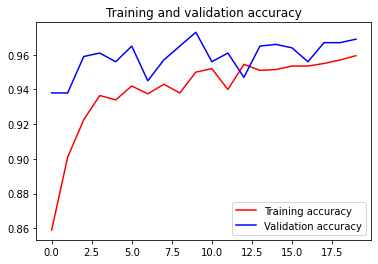

<Figure size 432x288 with 0 Axes>

In [9]:
import matplotlib.pyplot as plt
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'r', label='Training accuracy')
plt.plot(epochs, val_acc, 'b', label='Validation accuracy')
plt.title('Training and validation accuracy')
plt.legend(loc=0)
plt.figure()


plt.show()